### 1: Import all the necessary libs

In [1]:
import pandas as pd
import numpy as np
import requests 
import tweepy 
import wptools
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import re
import time
import json
import wget
import base64
from PIL import Image
from io import BytesIO
from IPython.display import HTML
import glob
from nltk.corpus import stopwords
%matplotlib inline

### 2: Read existing data in

In [2]:
dog_rates = pd.read_csv('twitter-archive-enhanced.csv')
dog_rates_image = pd.read_csv('image-predictions.tsv', sep='\t')
pd.set_option('max_colwidth', 200)
pd.set_option('display.max_colwidth', -1)

### 3: Gather more data using tweepy
- gather data: based on tweet id, get the json file of each tweet
- save data: write the json file using appending mode 'a' to one file
- extract data to form additional DataFrame: tweet_id, retweet_count, favorite_count, follower_count, media_url,. For this part, should have the basic knowledge of tweet json file. Since we have image-predictions file, may media_url is not that necessary
- save the gathering data to csv file

In [3]:
# prepare to use tweepy
# delte
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, proxy="10.240.49.201:8080")

In [4]:
# gather and save data
'''
print (time.time())
tweet_list = []
for loop in range(2):
    tweet_id = dog_rates.loc[loop, 'tweet_id']
    public_tweets = api.home_timeline(id='WeRateDogs', max_id=tweet_id, count=1)
    #for tweet in public_tweets:
        #tweet_list.append({'tweet_id':tweet_id, 'retweet_count': tweet.retweet_count, 'favorite_count':tweet.favorite_count})
    with open('/Users/mhl/Documents/NanoDegree/Project2/data_gather_json.txt', 'a') as file:
        json.dump(public_tweets[0]._json, file) 
print (time.time())   
'''

"\nprint (time.time())\ntweet_list = []\nfor loop in range(2):\n    tweet_id = dog_rates.loc[loop, 'tweet_id']\n    public_tweets = api.home_timeline(id='WeRateDogs', max_id=tweet_id, count=1)\n    #for tweet in public_tweets:\n        #tweet_list.append({'tweet_id':tweet_id, 'retweet_count': tweet.retweet_count, 'favorite_count':tweet.favorite_count})\n    with open('/Users/mhl/Documents/NanoDegree/Project2/data_gather_json.txt', 'a') as file:\n        json.dump(public_tweets[0]._json, file) \nprint (time.time())   \n"

In [5]:
# extract data
tweet_list = []
file = open('/Users/mhl/Documents/NanoDegree/Project2/tweet_json.txt', 'r')
for line in file:
    tweet_list.append(json.loads(line))

In [6]:
# find difference for each kind of tweet
dog_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [7]:
# 156 retweet his own tweet, all have retweet_status_id, why cannot find this keyword in json?
dog_rates_retweet_himself = dog_rates[~dog_rates.text.str.extract('(^RT @dog_rates.*)').isnull()]
for loop in tweet_list:
    if loop['id'] == dog_rates_retweet_himself.tweet_id.iloc[5]:
        print ('yes')
        break
'''
for loop in tweet_list:
    if loop['id'] == 866334964761202691:
        print ('yes')
        break
loop
'''
loop

yes


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Jun 13 01:14:41 +0000 2017',
 'display_text_range': [0, 140],
 'entities': {'hashtags': [],
  'symbols': [],
  'urls': [],
  'user_mentions': [{'id': 4196983835,
    'id_str': '4196983835',
    'indices': [3, 13],
    'name': 'SpookyWeRateDogs™',
    'screen_name': 'dog_rates'}]},
 'favorite_count': 0,
 'favorited': False,
 'full_text': "RT @dog_rates: This is Coco. At first I thought she was a cloud but clouds don't bork with such passion. 12/10 would hug softly https://t.c…",
 'geo': None,
 'id': 874434818259525634,
 'id_str': '874434818259525634',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'retweet_count': 15442,
 'retweeted': False,
 'retweeted_status': {'contributors': None,
  'coordinates': None,
  'created_at': 'Sun May 21 16:48:45 +000

In [8]:
# 78 in reply tweet
dog_rates_in_reply = dog_rates[~pd.isnull(dog_rates.in_reply_to_user_id)]
for loop in tweet_list:
    if loop['id'] == dog_rates_in_reply.tweet_id.iloc[5]:
        print ('yes')
        break
'''
for loop in tweet_list:
    if loop['id'] == 667152164079423490:
        print ('yes')
        break
'''
loop

yes


{'contributors': None,
 'coordinates': None,
 'created_at': 'Fri May 12 17:12:53 +0000 2017',
 'display_text_range': [0, 139],
 'entities': {'hashtags': [],
  'media': [{'display_url': 'pic.twitter.com/lVU5GyNFen',
    'expanded_url': 'https://twitter.com/dog_rates/status/863079547188785154/photo/1',
    'id': 863079538779013120,
    'id_str': '863079538779013120',
    'indices': [140, 163],
    'media_url': 'http://pbs.twimg.com/media/C_pGRInUwAAmTY_.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/C_pGRInUwAAmTY_.jpg',
    'sizes': {'large': {'h': 1035, 'resize': 'fit', 'w': 749},
     'medium': {'h': 1035, 'resize': 'fit', 'w': 749},
     'small': {'h': 680, 'resize': 'fit', 'w': 492},
     'thumb': {'h': 150, 'resize': 'crop', 'w': 150}},
    'type': 'photo',
    'url': 'https://t.co/lVU5GyNFen'}],
  'symbols': [],
  'urls': [],
  'user_mentions': []},
 'extended_entities': {'media': [{'display_url': 'pic.twitter.com/lVU5GyNFen',
    'expanded_url': 'https://twitter.com/do

In [9]:
# 181 retweet id not null
dog_rates_retweet_not_null = dog_rates[~pd.isnull(dog_rates.retweeted_status_id)]
#print (dog_rates_retweet_not_null.retweeted_status_id)
for loop in tweet_list:
    if loop['id'] == dog_rates_retweet_not_null.tweet_id.iloc[6]:
        print ('yes')
        break
loop

yes


{'contributors': None,
 'coordinates': None,
 'created_at': 'Wed Jun 21 19:36:23 +0000 2017',
 'display_text_range': [0, 122],
 'entities': {'hashtags': [],
  'media': [{'display_url': 'pic.twitter.com/dJx4Gzc50G',
    'expanded_url': 'https://twitter.com/rachel2195/status/876850772322988033/photo/1',
    'id': 876850756556607488,
    'id_str': '876850756556607488',
    'indices': [99, 122],
    'media_url': 'http://pbs.twimg.com/media/DCszHgmW0AAmIpT.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DCszHgmW0AAmIpT.jpg',
    'sizes': {'large': {'h': 2048, 'resize': 'fit', 'w': 1536},
     'medium': {'h': 1200, 'resize': 'fit', 'w': 900},
     'small': {'h': 680, 'resize': 'fit', 'w': 510},
     'thumb': {'h': 150, 'resize': 'crop', 'w': 150}},
    'source_status_id': 876850772322988033,
    'source_status_id_str': '876850772322988033',
    'source_user_id': 512804507,
    'source_user_id_str': '512804507',
    'type': 'photo',
    'url': 'https://t.co/dJx4Gzc50G'}],
  'symbols

In [10]:
dog_rates_add = []
for tweet in tweet_list:
    if tweet.get('retweeted_status'):
        dog_rates_add.append({'tweet_id':tweet['id'],\
                              'favorite_count':tweet['retweeted_status']['favorite_count'],\
                              'retweet_count':tweet['retweeted_status']['retweet_count'],\
                              'followers_count':tweet['user']['followers_count']})
    else:
        dog_rates_add.append({'tweet_id':tweet['id'],\
                              'favorite_count':tweet['favorite_count'],\
                              'retweet_count':tweet['retweet_count'],\
                              'followers_count':tweet['user']['followers_count']})        
dog_rates_add = pd.DataFrame(dog_rates_add)

In [11]:
dog_rates_add.to_csv('dog_rates_add.csv')

### 4: Assess

#### Quality
##### `dog_rates` table
- timestamp should be datetime

- source, expanded url seems not that useful, can drop
- some items are duplicate, e.g., 'This is Charlie. He fell asleep on a heating vent...' All duplicate are from the items that author retweets his own tweet. no matter, we will drop all the in_reply and retweet ones this time
- for the first time, we just focus on the tweet created directly by author, so drop in_reply and retweet onesretweet ones. And drop the items and related columns

- rating_denominator min/max value is not reasonable, because several dogs in one picture
- the rating_numerator is not extractely correctly, the text may include two xx/xx string, should get the score one, e.g, '...ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho...'
- some xx/xx strings are not rating value, e.g., '...She smiles 24/7 &amp...', its tweetid is 810984652412424192 
- rating for tweet_id 676957860086095872 is wrong, extract not correctly

- name is not extractely correctly, 'This is by far', should not always extract the word after 'This is'. remove the wrong names, e.g., 'a', 'an', 'the'.etc
- (to do)name "jack is xxx", some names can not be extracted correctly
- some stage items are not right, e.g., 'doggopupper', 'doggofloofer'.etc
- for the dog bread, just keep the dog breed that confidience value bigger than 0.5. rename p1 to breed
- for name, stage, breed. make all the none to '', to display more clearly
- add another two columns, retweet_probability, favorite_probability, float, then recalculate by deviding follower_counts
- drop the unuseful column, rating_denominator

##### `dog_rates_image` table
- many duplicate items in image file, most of them are retweet. However, if we delete retweet items, this will be not that important

##### `dog_rates_add` table

#### Tidiness
##### `dog_rates` table
- doggo, floofer, pupper, puppo should be one column, all describe the stage of dog. Then drop columns 'doggo, floofer, pupper, puppo'

##### `dog_rates_image` table
- image url, p1, p1_conf, p1_dog should be integrated to dog_rates_table

##### `dog_rates_add` table
- all the information should be integrated to dog_rates_table


In [12]:
# dog_rates table
dog_rates.head(5)
# doggo, floofer, pupper, puppo should be one column, all describe the stage of dog

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [13]:
dog_rates.describe()
# the rating_numerator and rating_denominator min/max value is not reasonable

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
dog_rates.info()
# timestamp should be datatime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [15]:
dog_rates.sample(20)
# name is not extractely correctly, 'This is by far', should not always extract the word after 'This is', 'say hello to', ''
# some xx/xx strings are not rating value, e.g., '...7/10 would walk the shit out o...'

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
54,881666595344535552,NaN,NaN,2017-07-03 00:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Gary. He couldn't miss this puppertunity for a selfie. Flawless focusing skills. 13/10 would boop intensely https://t.co/7CSWCl8I6s,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881666595344535552/photo/1,13,10,Gary,None,None,None,None
2208,668625577880875008,NaN,NaN,2015-11-23 03:02:14 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Maks. Maks just noticed something wasn't right. 10/10 https://t.co/0zBycaxyvs,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668625577880875008/photo/1,10,10,Maks,None,None,None,None
1183,718939241951195136,NaN,NaN,2016-04-09 23:10:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Otis. Everybody look at Otis. 12/10 would probably faint while petting https://t.co/I9qoe1uEih,NaN,NaN,NaN,https://twitter.com/dog_rates/status/718939241951195136/photo/1,12,10,Otis,None,None,None,None
2279,667405339315146752,NaN,NaN,2015-11-19 18:13:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Biden. Biden just tripped... 7/10 https://t.co/3Fm9PwLju1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667405339315146752/photo/1,7,10,Biden,None,None,None,None
931,754120377874386944,NaN,NaN,2016-07-16 01:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","When you hear your owner say they need to hatch another egg, but you've already been on 17 walks today. 10/10 https://t.co/lFEoGqZ4oA",NaN,NaN,NaN,https://twitter.com/dog_rates/status/754120377874386944/photo/1,10,10,None,None,None,None,None
420,822163064745328640,NaN,NaN,2017-01-19 19:25:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Mattie. She's extremely dangerous. Will bite your h*ckin finger right off. Still 11/10 would pet with caution https:…,7.862340e+17,4.196984e+09,2016-10-12 15:55:59 +0000,https://twitter.com/dog_rates/status/786233965241827333/photo/1,11,10,Mattie,None,None,None,None
1459,695064344191721472,NaN,NaN,2016-02-04 02:00:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",NaN,NaN,NaN,https://twitter.com/dog_rates/status/695064344191721472/video/1,4,10,None,None,None,None,None
993,748575535303884801,NaN,NaN,2016-06-30 17:54:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is one of the most reckless puppers I've ever seen. How she got a license in the first place is beyond me. 6/10 https://t.co/z5bAdtn9kd,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748575535303884801/photo/1,6,10,one,None,None,None,None
132,866816280283807744,NaN,NaN,2017-05-23 00:41:20 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7T…",8.664507e+17,4.196984e+09,2017-05-22 00:28:40 +0000,"https://twitter.com/dog_rates/status/866450705531457537/photo/1,https://twitter.com/dog_rates/status/866450705531457537/photo/1",13,10,Jamesy,None,None,pupper,None
1480,693486665285931008,NaN,NaN,2016-01-30 17:31:20 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lincoln. He doesn't understand his new jacket. 11/10 please enjoy (vid by @GraceIsTheName8)

In [16]:
dog_rates.source.value_counts()
# most of them are from iphone

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [17]:
dog_rates.retweeted_status_user_id.value_counts()
# most retweet his own tweet

4.196984e+09    156
4.296832e+09    2  
5.870972e+07    1  
6.669901e+07    1  
4.119842e+07    1  
7.475543e+17    1  
7.832140e+05    1  
7.266347e+08    1  
4.871977e+08    1  
5.970642e+08    1  
4.466750e+07    1  
1.228326e+09    1  
7.992370e+07    1  
2.488557e+07    1  
7.874618e+17    1  
3.638908e+08    1  
5.128045e+08    1  
8.117408e+08    1  
1.732729e+09    1  
1.960740e+07    1  
1.547674e+08    1  
3.410211e+08    1  
7.124572e+17    1  
2.804798e+08    1  
1.950368e+08    1  
Name: retweeted_status_user_id, dtype: int64

In [18]:
dog_rates.in_reply_to_user_id.value_counts()
# most in reply his own tweet

4.196984e+09    47
2.195506e+07    2 
7.305050e+17    1 
2.916630e+07    1 
3.105441e+09    1 
2.918590e+08    1 
2.792810e+08    1 
2.319108e+09    1 
1.806710e+08    1 
3.058208e+07    1 
2.625958e+07    1 
1.943518e+08    1 
3.589728e+08    1 
8.405479e+17    1 
2.894131e+09    1 
2.143566e+07    1 
2.281182e+09    1 
1.648776e+07    1 
4.717297e+09    1 
2.878549e+07    1 
1.582854e+09    1 
4.670367e+08    1 
4.738443e+07    1 
1.361572e+07    1 
1.584641e+07    1 
2.068372e+07    1 
1.637468e+07    1 
1.185634e+07    1 
1.198989e+09    1 
1.132119e+08    1 
7.759620e+07    1 
Name: in_reply_to_user_id, dtype: int64

In [19]:
dog_rates.name.value_counts()

None         745
a            55 
Charlie      12 
Cooper       11 
Lucy         11 
Oliver       11 
Tucker       10 
Lola         10 
Penny        10 
Bo           9  
Winston      9  
the          8  
Sadie        8  
Buddy        7  
an           7  
Toby         7  
Daisy        7  
Bailey       7  
Leo          6  
Scout        6  
Milo         6  
Dave         6  
Jack         6  
Koda         6  
Bella        6  
Oscar        6  
Rusty        6  
Jax          6  
Stanley      6  
Sammy        5  
            ..  
Stefan       1  
Yoda         1  
Mason        1  
Monty        1  
Miguel       1  
Billy        1  
Deacon       1  
Tobi         1  
Snicku       1  
William      1  
Jackie       1  
Stark        1  
Aldrick      1  
Huck         1  
Jimbo        1  
Monster      1  
Fiji         1  
Dallas       1  
Bonaparte    1  
Bookstore    1  
Brat         1  
Hermione     1  
Rizzo        1  
all          1  
Pumpkin      1  
DonDon       1  
Grey         1  
Trip         1

In [20]:
dog_rates.retweeted_status_id[dog_rates.name == 'Charlie']
print (dog_rates[dog_rates.tweet_id == dog_rates.retweeted_status_id.iloc[230]])
print (dog_rates[dog_rates.tweet_id == dog_rates.tweet_id.iloc[230]])
# some item are duplicate 

               tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
338  832369877331693569 NaN                    NaN                    

                     timestamp  \
338  2017-02-16 23:23:38 +0000   

                                                                                 source  \
338  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                         text  \
338  This is Charlie. He fell asleep on a heating vent. Would puppreciate your assistance. 11/10 someone help Charlie https://t.co/Dhdx5HnQ4d   

     retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp  \
338 NaN                  NaN                        NaN                         

                                                       expanded_urls  \
338  https://twitter.com/dog_rates/status/832369877331693569/photo/1   

     r

In [21]:
item_duplicate_list = []
print (dog_rates_retweet_not_null.index)
for item_index in dog_rates_retweet_not_null.index:
    if dog_rates_retweet_not_null.loc[item_index, 'retweeted_status_id'] in list(dog_rates.tweet_id):
        #print (dog_rates_retweet_not_null.loc[item_index])
        #print (dog_rates[dog_rates.tweet_id == dog_rates_retweet_not_null.loc[item_index, 'retweeted_status_id']])
        item_duplicate_list.append(dog_rates_retweet_not_null.loc[item_index, 'tweet_id'])
print (len(item_duplicate_list))
# all duplicate are from the items that author retweets his own tweet

Int64Index([  19,   32,   36,   68,   73,   74,   78,   91,   95,   97,
            ...
             926,  937,  943,  949, 1012, 1023, 1043, 1242, 2259, 2260],
           dtype='int64', length=181)
156


In [22]:
dog_rates_in_reply.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1885,674793399141146624,6.717299e+17,4.196984e+09,2015-12-10 03:30:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I have found another. 13/10 https://t.co/HwroPYv8pY,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674793399141146624/photo/1,13,10,None,None,None,None,None
1080,738891149612572673,7.384119e+17,3.589728e+08,2016-06-04 00:32:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@mount_alex3 13/10,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None
1005,747651430853525504,7.476487e+17,4.196984e+09,2016-06-28 04:42:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Other pupper asked not to have his identity shared. Probably just embarrassed about the headbutt. Also 12/10 it'll be ok mystery pup,NaN,NaN,NaN,NaN,12,10,None,None,None,pupper,None
1605,685681090388975616,6.855479e+17,4.196984e+09,2016-01-09 04:34:45 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Jack deserves another round of applause. If you missed this earlier today I strongly suggest reading it. Wonderful first 14/10 🐶❤️,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
513,811647686436880384,8.116272e+17,4.196984e+09,2016-12-21 19:01:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",PUPDATE: I've been informed that Augie was actually bringing his family these flowers when he tripped. Very good boy. Pupgraded to 11/10,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
251,844979544864018432,7.590995e+17,4.196984e+09,2017-03-23 18:29:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","PUPDATE: I'm proud to announce that Toby is 236 days sober. Pupgraded to a 13/10. We're all very proud of you, Toby https://t.co/a5OaJeRl9B",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/844979544864018432/photo/1,https://twitter.com/dog_rates/status/844979544864018432/photo/1,https://twitter.com/dog_rates/status/844979544864018432/photo/1",13,10,None,None,None,None,None
1497,692423280028966913,6.924173e+17,4.196984e+09,2016-01-27 19:05:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",PUPDATE: just noticed this dog has some extra legs. Very advanced. Revolutionary af. Upgraded to a 9/10,NaN,NaN,NaN,NaN,9,10,None,None,None,None,None
1446,696490539101908992,6.964887e+17,4.196984e+09,2016-02-08 00:27:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After reading the comments I may have overestimated this pup. Downgraded to a 1/10. Please forgive me,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
1940,673716320723169284,6.737159e+17,4.196984e+09,2015-12-07 04:11:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The millennials have spoken and we've decided to immediately demote to a 1/10. Thank you,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
1127,729838605770891264,7.291135e+17,4.196984e+09,2016-05-10 01:00:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Challenge completed"" \n(pupgraded to 12/10) https://t.co/85dTK7XCXB",NaN,NaN,NaN,https://twitter.com/dog_rates/status/729838605770891264/video/1,12,10,None,None,None,None,None


In [23]:
dog_rates.rating_denominator.value_counts()
# some weird values, 11, 2, 15 etc

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [24]:
dog_rates.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [25]:
# dog_rates_image table
dog_rates_image.head()
# p2 etc information seems not that useful

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [26]:
dog_rates_image.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
314,671729906628341761,https://pbs.twimg.com/media/CVJ2yR2UwAAdCzU.jpg,1,kuvasz,0.431469,True,Samoyed,0.117122,True,white_wolf,0.090067,False
685,683857920510050305,https://pbs.twimg.com/media/CX2NJmRWYAAxz_5.jpg,1,bluetick,0.174738,True,Shetland_sheepdog,0.126101,True,beagle,0.122887,True
1863,842846295480000512,https://pbs.twimg.com/media/C7JkO0rX0AErh7X.jpg,1,Labrador_retriever,0.461076,True,golden_retriever,0.154946,True,Chihuahua,0.110249,True
1717,819015331746349057,https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg,4,prison,0.907083,False,palace,0.020089,False,umbrella,0.007850,False
602,679828447187857408,https://pbs.twimg.com/media/CW88XN4WsAAlo8r.jpg,3,Chihuahua,0.346545,True,dalmatian,0.166246,True,toy_terrier,0.117502,True
1064,715360349751484417,https://pbs.twimg.com/media/Ce14cOvWwAAcFJH.jpg,1,nail,0.855552,False,screw,0.073277,False,padlock,0.023970,False
1371,762316489655476224,https://pbs.twimg.com/media/CpRKzZKWAAABGh7.jpg,1,African_grey,0.270468,False,Madagascar_cat,0.076187,False,television,0.033306,False
1580,796387464403357696,https://pbs.twimg.com/media/Cw1WKu1UQAAvWsu.jpg,1,Pekinese,0.461164,True,Pomeranian,0.288650,True,Siamese_cat,0.052423,False
1873,845306882940190720,https://pbs.twimg.com/media/C7siH5DXkAACnDT.jpg,1,Irish_water_spaniel,0.567475,True,Labrador_retriever,0.169496,True,curly-coated_retriever,0.101518,True
459,674790488185167872,https://pbs.twimg.com/media/CV1WXsmWcAAgQ56.jpg,1,Labrador_retriever,0.801903,True,Chesapeake_Bay_retriever,0.193575,True,Rottweiler,0.001193,True


In [27]:
sum(dog_rates_image.jpg_url.isnull())

0

In [28]:
dog_rates_image[dog_rates_image.jpg_url.duplicated()]
dog_rates_image[dog_rates_image.jpg_url == 'https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
591,679158373988876288,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.25153,True,bath_towel,0.116806,False
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.25153,True,bath_towel,0.116806,False


In [29]:
dog_rates[dog_rates.tweet_id == 679158373988876288]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1744,679158373988876288,NaN,NaN,2015-12-22 04:35:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Rubio. He has too much skin. 11/10 https://t.co/NLOHmlENag,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679158373988876288/photo/1,11,10,Rubio,None,None,None,None


In [30]:
dog_rates[dog_rates.tweet_id == 754874841593970688]
# many duplicate items in image file, most of them are retweet. 
# However, it is not that important, if we delete his own retweet in dog_rates, will not get the image duplicate.

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
926,754874841593970688,NaN,NaN,2016-07-18 03:06:01 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Rubio. He has too much skin. 11/10 https://t.co/NLOHmlENag,6.791584e+17,4.196984e+09,2015-12-22 04:35:49 +0000,"https://twitter.com/dog_rates/status/679158373988876288/photo/1,https://twitter.com/dog_rates/status/679158373988876288/photo/1",11,10,Rubio,None,None,None,None


In [31]:
# dog_rates_add table
dog_rates_add.head()

,favorite_count,followers_count,retweet_count,tweet_id
0,39492,3768791,8842,892420643555336193
1,33786,3768791,6480,892177421306343426
2,25445,3768791,4301,891815181378084864
3,42863,3768791,8925,891689557279858688
4,41016,3768791,9721,891327558926688256


In [32]:
dog_rates_add.followers_count.max() - dog_rates_add.followers_count.min()
# no big difference

387

### 5: Clean

#### Quality
##### `dog_rates` table
- timestamp should be datetime

- source, expanded url seems not that useful, can drop
- some items are duplicate, e.g., 'This is Charlie. He fell asleep on a heating vent...' All duplicate are from the items that author retweets his own tweet. no matter, we will drop all the in_reply and retweet ones this time
- for the first time, we just focus on the tweet created directly by author, so drop in_reply and retweet onesretweet ones. And drop the items and related columns

- rating_denominator min/max value is not reasonable, because several dogs in one picture
- the rating_numerator is not extractely correctly, the text may include two xx/xx string, should get the score one, e.g, '...ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho...'
- some xx/xx strings are not rating value, e.g., '...She smiles 24/7 &amp...', its tweetid is 810984652412424192 
- rating for tweet_id 676957860086095872 is wrong, extract not correctly

- name is not extractely correctly, 'This is by far', should not always extract the word after 'This is'. remove the wrong names, e.g., 'a', 'an', 'the'.etc
- (to do)name "jack is xxx", some names can not be extracted correctly
- some stage items are not right, e.g., 'doggopupper', 'doggofloofer'.etc
- for the dog bread, just keep the dog breed that confidience value bigger than 0.5. rename p1 to breed
- for name, stage, breed. make all the none to '', to display more clearly
- add another two columns, retweet_probability, favorite_probability, float, then recalculate by deviding follower_counts
- drop the unuseful column, rating_denominator

##### `dog_rates_image` table
- many duplicate items in image file, most of them are retweet. However, if we delete retweet items, this will be not that important

##### `dog_rates_add` table

#### Tidiness
##### `dog_rates` table
- doggo, floofer, pupper, puppo should be one column, all describe the stage of dog. Then drop column 'doggo, floofer, pupper, puppo'

##### `dog_rates_image` table
- image url, p1, p1_conf, p1_dog should be integrated to dog_rates_table

##### `dog_rates_add` table
- all the information should be integrated to dog_rates_table


#### Tidiness

##### Define
###### `dog_rates_add` table
- all the information should be integrated to dog_rates_table. Use pd.merge

##### Code

In [33]:
dog_rates_clean = dog_rates.copy()
dog_rates_clean = pd.merge(dog_rates_clean, dog_rates_add, on='tweet_id')

##### Test

In [34]:
dog_rates_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,followers_count,retweet_count
1970,673148804208660480,NaN,NaN,2015-12-05 14:35:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Fletcher. He's had a ruff night. No more Fireball for Fletcher. 8/10 it'll be over soon pupper https://t.co/tA4WpkI2cw,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673148804208660480/photo/1,8,10,Fletcher,None,None,pupper,None,1817,3768961,687
2339,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Let's hope this flight isn't Malaysian (lol). What a dog! Almost completely camouflaged. 10/10 I trust this pilot https://t.co/Yk6GHE9tOY,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100786774016/photo/1,10,10,None,None,None,None,None,334,3769030,173
1778,677687604918272002,NaN,NaN,2015-12-18 03:11:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This was Cindy's face when she heard Susan forgot the snacks for after the kid's soccer game. 11/10 https://t.co/gzkuVGRgAD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677687604918272002/photo/1,11,10,None,None,None,None,None,2670,3768918,948
1566,687732144991551489,NaN,NaN,2016-01-14 20:24:55 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is Ember. That's the q-tip she owes money to. 11/10 pay up pup. (vid by @leanda_h) https://t.co/kGRcRjRJRl,NaN,NaN,NaN,https://vine.co/v/iOuMphL5DBY,11,10,Ember,None,None,None,None,1930,3768885,745
1597,686003207160610816,NaN,NaN,2016-01-10 01:54:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Hammond. He's a peculiar pup. Loves long walks. Bark barely audible. Too many legs. 3/10 must be rare https://t.co/NOIiRWr5Jf,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686003207160610816/photo/1,3,10,Hammond,None,None,None,None,2002,3768890,730
447,818646164899774465,NaN,NaN,2017-01-10 02:30:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Seamus. He's very bad at entering pools. Still a very good boy tho 11/10 https://t.co/hfi264QwYM,8.083449e+17,4.196984e+09,2016-12-12 16:16:49 +0000,"https://vine.co/v/5QWd3LZqXxd,https://vine.co/v/5QWd3LZqXxd",11,10,Seamus,None,None,None,None,47106,3768857,23959
1936,673716320723169284,6.737159e+17,4.196984e+09,2015-12-07 04:11:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The millennials have spoken and we've decided to immediately demote to a 1/10. Thank you,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None,3274,3768951,839
365,828708714936930305,NaN,NaN,2017-02-06 20:55:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Fiona. She's an exotic dog. Seems rather impatient. Jaw extension on another level tho. Looks slippery. 10/10 would still pet https://t.co/vst2SEVJO3,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/828708714936930305/photo/1,https://twitter.com/dog_rates/status/828708714936930305/photo/1",10,10,Fiona,None,None,None,None,40107,3768848,12811
2074,670832455012716544,NaN,NaN,2015-11-29 05:11:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Amy. She is Queen Starburst. 10/10 unexplainably juicy https://t.co/Hj2HtxpcSx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670832455012716544/photo/1,10,10,Amy,None,None,None,None,775,3768988,242
1777,677698403548192770,NaN,NaN,2015-12-18 03:54:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sadie. She got her holid

In [35]:
len(dog_rates_clean)

2352

##### Define
##### `dog_rates_image` table
- image url, p1, p1_conf, p1_dog should be integrated to dog_rates_table. Use pd.merge

##### Code

In [36]:
dog_rates_clean = pd.merge(dog_rates_clean, dog_rates_image[['tweet_id', 'jpg_url', 'p1', 'p1_conf', 'p1_dog']])

##### Test

In [37]:
dog_rates_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,floofer,pupper,puppo,favorite_count,followers_count,retweet_count,jpg_url,p1,p1_conf,p1_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,None,None,None,39492,3768791,8842,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,None,None,None,33786,3768791,6480,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,None,None,None,25445,3768791,4301,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,None,None,None,42863,3768791,8925,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,None,None,None,41016,3768791,9721,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True


In [38]:
len(dog_rates_clean)

2073

#### Tidiness
##### `dog_rates` table
- doggo, floofer, pupper, puppo should be one column, all describe the stage of dog. Add the column 'stage'
- drop the four columns

##### Code

In [39]:
dog_rates_clean['stage'] = dog_rates_clean.doggo.replace('None', '') + dog_rates_clean.pupper.replace('None', '') + \
dog_rates_clean.puppo.replace('None', '') + dog_rates_clean.floofer.replace('None', '')

##### Test

In [40]:
dog_rates_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,pupper,puppo,favorite_count,followers_count,retweet_count,jpg_url,p1,p1_conf,p1_dog,stage
87,872486979161796608,NaN,NaN,2017-06-07 16:14:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We. Only. Rate. Dogs. Do not send in other things like this fluffy floor shark clearly ready to attack. Get it together guys... 12/10 https://t.co/BZHiKx3FpQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872486979161796608/photo/1,...,None,None,41474,3768813,9365,https://pbs.twimg.com/media/DBuyRlTUwAAYhG9.jpg,Pembroke,0.931861,True,
2042,666418789513326592,NaN,NaN,2015-11-17 00:53:15 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Walter. He is an Alaskan Terrapin. Loves outdated bandanas. One ear still working. Cool house plant. 10/10 https://t.co/qXpcwENTvn,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666418789513326592/photo/1,...,None,None,129,3769029,48,https://pbs.twimg.com/media/CT-YWb7U8AA7QnN.jpg,toy_terrier,0.149680,True,
849,744709971296780288,NaN,NaN,2016-06-20 01:54:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Harvey. He's stealthy af. 10/10 would do my best to pet https://t.co/zAzaRT6NnT,NaN,NaN,NaN,https://twitter.com/dog_rates/status/744709971296780288/photo/1,...,None,None,6127,3768792,1757,https://pbs.twimg.com/media/ClW9w7mWEAEFN1k.jpg,Shetland_sheepdog,0.234431,True,
898,737322739594330112,NaN,NaN,2016-05-30 16:40:14 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Lily. She's not injured or anything. Just wants everyone to hear her. 9/10 clever af https://t.co/3xqGVH0Dhw,NaN,NaN,NaN,https://twitter.com/dog_rates/status/737322739594330112/photo/1,...,None,None,3939,3768800,902,https://pbs.twimg.com/media/Cjt_Hm6WsAAjkPG.jpg,guinea_pig,0.148526,False,
1020,714141408463036416,NaN,NaN,2016-03-27 17:25:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I know we only rate dogs, but since it's Easter I guess we could rate a bunny for a change. 10/10 petable as hell https://t.co/O2RlKXigHu",NaN,NaN,NaN,https://twitter.com/dog_rates/status/714141408463036416/photo/1,...,None,None,4657,3768816,1560,https://pbs.twimg.com/media/Cekj0qwXEAAHcS6.jpg,Labrador_retriever,0.586951,True,


In [41]:
dog_rates_clean.stage.value_counts()

                1752
pupper          211 
doggo           67  
puppo           23  
doggopupper     11  
floofer         7   
doggofloofer    1   
doggopuppo      1   
Name: stage, dtype: int64

In [42]:
dog_rates_clean.text[dog_rates_clean.stage == 'doggopupper']

365    This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7
428    Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho                    
456    Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze                                                                                               
463    This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj                    
565    This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd
626    RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda                                            

##### Code

In [43]:
# drop the four columns
dog_rates_clean = dog_rates_clean.drop(['pupper', 'puppo', 'doggo', 'floofer'], axis=1)

##### Test

In [44]:
dog_rates_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,rating_denominator,name,favorite_count,followers_count,retweet_count,jpg_url,p1,p1_conf,p1_dog,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,10,Phineas,39492,3768791,8842,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,10,Tilly,33786,3768791,6480,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,10,Archie,25445,3768791,4301,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,10,Darla,42863,3768791,8925,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,10,Franklin,41016,3768791,9721,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,


#### Quality
##### `dog_rates` table
- timestamp should be datetime. Use to_datetime

##### Code

In [45]:
dog_rates_clean.timestamp = pd.to_datetime(dog_rates_clean.timestamp)

##### Test

In [46]:
dog_rates_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 21 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null datetime64[ns]
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
favorite_count                2073 non-null int64
followers_count               2073 non-null int64
retweet_count                 2073 non-null int64
jpg_url                       2073 non-null object
p1                            

#### Quality
##### `dog_rates` table
- source, expanded url seems not that useful, can drop

##### Code

In [47]:
dog_rates_clean = dog_rates_clean.drop(['source', 'expanded_urls'], axis=1)

##### Test

In [48]:
dog_rates_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,favorite_count,followers_count,retweet_count,jpg_url,p1,p1_conf,p1_dog,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,13,10,Phineas,39492,3768791,8842,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,13,10,Tilly,33786,3768791,6480,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,12,10,Archie,25445,3768791,4301,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,13,10,Darla,42863,3768791,8925,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,12,10,Franklin,41016,3768791,9721,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,


##### `dog_rates` table
- for the first time, we just focus on the tweet created directly by author, so drop in_reply and retweet ones

##### Code

In [49]:
in_reply_index = dog_rates_clean[~dog_rates_clean['in_reply_to_status_id'].isnull()].index

In [50]:
dog_rates_clean = dog_rates_clean.drop(in_reply_index)

In [51]:
dog_rates_clean = dog_rates_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1)

##### Test

In [52]:
dog_rates_clean.head()

,tweet_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,favorite_count,followers_count,retweet_count,jpg_url,p1,p1_conf,p1_dog,stage
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,13,10,Phineas,39492,3768791,8842,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,13,10,Tilly,33786,3768791,6480,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,12,10,Archie,25445,3768791,4301,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,13,10,Darla,42863,3768791,8925,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,12,10,Franklin,41016,3768791,9721,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,


##### Code

In [53]:
retweet_index = dog_rates_clean[~dog_rates_clean['retweeted_status_id'].isnull()].index

In [54]:
dog_rates_clean = dog_rates_clean.drop(retweet_index)

In [55]:
dog_rates_clean = dog_rates_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

##### Test

In [56]:
dog_rates_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,favorite_count,followers_count,retweet_count,jpg_url,p1,p1_conf,p1_dog,stage
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,39492,3768791,8842,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,33786,3768791,6480,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,25445,3768791,4301,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,42863,3768791,8925,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,41016,3768791,9721,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,


##### `dog_rates` table
- the rating_numerator is not extractely correctly, the text may include two xx/xx string, should get the score one, e.g, '...ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho...'
- rating for text with '...10/10' will not be extracted correctly using my before regression
- some xx/xx strings are not rating value, e.g., '...She smiles 24/7 &amp...', its tweetid is 810984652412424192 
- rating_denominator min/max value is not reasonable
- rating for tweet_id 676957860086095872 is wrong, extract not correctly

In [57]:
# the rating_numerator is not extractely correctly, the text may include two xx/xx string, \
# should get the score one, e.g, '...ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho...'
len(dog_rates_clean[dog_rates_clean.rating_denominator != 10])

17

In [58]:
# david didnot extract float numerator correctly, so i totally re-write the reg. 
rating_extract = dog_rates_clean.text.str.extract('[^A-Za-z](\d+\.{0,1}\d*)/(\d+)[^A-Za-z0-9]*').astype(float)
rating_extract.columns = ['numerator', 'denominator']
dog_rates_clean.rating_numerator = rating_extract.numerator
dog_rates_clean.rating_denominator = rating_extract.denominator

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


In [59]:
len(dog_rates_clean[dog_rates_clean.rating_denominator != 10])

17

In [60]:
dog_rates_clean[dog_rates_clean.rating_denominator != 10]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,favorite_count,followers_count,retweet_count,jpg_url,p1,p1_conf,p1_dog,stage
344,820690176645140481,2017-01-15 17:52:40,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0,None,13476,3768857,3699,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,West_Highland_white_terrier,0.872064,True,
414,810984652412424192,2016-12-19 23:06:23,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24.0,7.0,Sam,5904,3768871,1647,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,golden_retriever,0.871342,True,
734,758467244762497024,2016-07-28 01:00:57,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150.0,None,5297,3768952,2516,https://pbs.twimg.com/ext_tw_video_thumb/758467147756691456/pu/img/YTNzjRFDSPNXukmM.jpg,Labrador_retriever,0.436377,True,
876,740373189193256964,2016-06-08 02:41:38,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9.0,11.0,None,37704,3768793,15029,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,golden_retriever,0.807644,True,
924,731156023742988288,2016-05-13 16:15:54,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170.0,this,4172,3768807,1427,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,lakeside,0.501767,False,
967,722974582966214656,2016-04-21 02:25:47,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4.0,20.0,None,4473,3768813,1754,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,Great_Dane,0.246762,True,
1001,716439118184652801,2016-04-03 01:36:11,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,50.0,Bluebert,2562,3768817,246,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,Siberian_husky,0.396495,True,
1022,713900603437621249,2016-03-27 01:29:02,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0,None,3049,3768817,827,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,golden_retriever,0.371816,True,
1047,710658690886586372,2016-03-18 02:46:49,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0,None,2513,3768819,633,https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg,soft-coated_wheaten_terrier,0.948617,True,
1065,709198395643068416,2016-03-14 02:04:08,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50.0,None,2623,3768824,716,https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg,borzoi,0.490783,True,


In [61]:
# get the second 'xx/xx' for certain items
tweet_id_list = [740373189193256964, 722974582966214656, 682962037429899265, 666287406224695296, 672248013293752320]
for loop in tweet_id_list:
    index = dog_rates_clean.text[dog_rates_clean.tweet_id == loop].index[0]
    m = re.match(r".*\W(\d*\.?\d+)/(\d+)\D*", dog_rates_clean.loc[index, 'text'])
    dog_rates_clean.loc[index, 'rating_numerator'] = int(m.group(1))
    dog_rates_clean.loc[index, 'rating_denominator'] = int(m.group(2))

In [62]:
len(dog_rates_clean[dog_rates_clean.rating_denominator != 10])

13

In [63]:
dog_rates_clean[dog_rates_clean.rating_denominator != 10]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,favorite_count,followers_count,retweet_count,jpg_url,p1,p1_conf,p1_dog,stage
344,820690176645140481,2017-01-15 17:52:40,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0,None,13476,3768857,3699,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,West_Highland_white_terrier,0.872064,True,
414,810984652412424192,2016-12-19 23:06:23,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24.0,7.0,Sam,5904,3768871,1647,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,golden_retriever,0.871342,True,
734,758467244762497024,2016-07-28 01:00:57,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150.0,None,5297,3768952,2516,https://pbs.twimg.com/ext_tw_video_thumb/758467147756691456/pu/img/YTNzjRFDSPNXukmM.jpg,Labrador_retriever,0.436377,True,
924,731156023742988288,2016-05-13 16:15:54,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170.0,this,4172,3768807,1427,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,lakeside,0.501767,False,
1001,716439118184652801,2016-04-03 01:36:11,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,50.0,Bluebert,2562,3768817,246,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,Siberian_husky,0.396495,True,
1022,713900603437621249,2016-03-27 01:29:02,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0,None,3049,3768817,827,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,golden_retriever,0.371816,True,
1047,710658690886586372,2016-03-18 02:46:49,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0,None,2513,3768819,633,https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg,soft-coated_wheaten_terrier,0.948617,True,
1065,709198395643068416,2016-03-14 02:04:08,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50.0,None,2623,3768824,716,https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg,borzoi,0.490783,True,
1131,704054845121142784,2016-02-28 21:25:30,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60.0,50.0,a,3193,3768840,1023,https://pbs.twimg.com/media/CcVOJEcXEAM0FHL.jpg,Great_Pyrenees,0.667939,True,
1207,697463031882764288,2016-02-10 16:51:59,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44.0,40.0,None,3730,3768857,1547,https://pbs.twimg.com/media/Ca3i7CzXIAMLhg8.jpg,Labrador_retriever,0.999885,True,


In [64]:
# some xx/xx strings are not rating value, e.g., '...She smiles 24/7 &amp...'
# since there's no rate score for this item, we need to use meam value for it
dog_rates_clean.rating_numerator.mean()
index = dog_rates_clean[dog_rates_clean.tweet_id == 810984652412424192].index[0]
dog_rates_clean.loc[index, 'rating_numerator'] = dog_rates_clean.rating_numerator.mean()
dog_rates_clean.loc[index, 'rating_denominator'] = 10

In [65]:
len(dog_rates_clean[dog_rates_clean.rating_denominator != 10])

12

In [66]:
# the rating_denominator min/max value is not reasonable
dog_rates_clean.rating_numerator[dog_rates_clean.rating_denominator>10] = \
dog_rates_clean.rating_numerator[dog_rates_clean.rating_denominator>10]/\
(dog_rates_clean.rating_denominator[dog_rates_clean.rating_denominator>10]/10)

dog_rates_clean.rating_denominator = 10

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [67]:
dog_rates_clean[dog_rates_clean.rating_denominator != 10]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,favorite_count,followers_count,retweet_count,jpg_url,p1,p1_conf,p1_dog,stage


In [68]:
dog_rates_clean.describe()

,tweet_id,rating_numerator,rating_denominator,favorite_count,followers_count,retweet_count,p1_conf
count,1.971000e+03,1971.000000,1971.0,1971.000000,1.971000e+03,1971.000000,1971.000000
mean,7.360418e+17,11.627573,10.0,8977.030949,3.768892e+06,2787.830036,0.594558
std,6.752810e+16,40.877426,0.0,12456.033983,7.174009e+01,4739.182501,0.272126
min,6.660209e+17,0.000000,10.0,81.000000,3.768776e+06,15.000000,0.044333
25%,6.758656e+17,10.000000,10.0,1992.000000,3.768830e+06,627.000000,0.363091
50%,7.088343e+17,11.000000,10.0,4128.000000,3.768884e+06,1362.000000,0.587764
75%,7.880951e+17,12.000000,10.0,11367.000000,3.768945e+06,3224.500000,0.847827
max,8.924206e+17,1776.000000,10.0,132318.000000,3.769163e+06,79116.000000,1.000000


##### `dog_rates` table
- rating for tweet_id 676957860086095872 is wrong, revise to 10

In [69]:
dog_rates_clean.rating_numerator[dog_rates_clean.tweet_id == 676957860086095872] = 10

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [70]:
dog_rates_clean[dog_rates_clean.tweet_id == 676957860086095872]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,favorite_count,followers_count,retweet_count,jpg_url,p1,p1_conf,p1_dog,stage
1533,676957860086095872,2015-12-16 02:51:45,10/10 I'd follow this dog into battle no questions asked https://t.co/ngTNXYQF0L,10.0,10,None,2381,3768922,902,https://pbs.twimg.com/ext_tw_video_thumb/676957802976419840/pu/img/dCj-qlXo73A5hf6Q.jpg,Labrador_retriever,0.772423,True,


##### `dog_rates` table
- name is not extractely correctly, 'This is by far', should not always extract the word after 'This is'. remove the wrong names, e.g., 'a, an, the etc'

In [71]:
stop = set(stopwords.words('english'))
stop.add('quite')

dog_rates_clean.name.value_counts()
for index in dog_rates_clean.index:
    if dog_rates_clean.loc[index, 'name'] != None and dog_rates_clean.loc[index, 'name'].lower() in stop:
        dog_rates_clean.loc[index, 'name'] = None

In [72]:
dog_rates_clean.name.value_counts()

None         524
Charlie      11 
Oliver       10 
Cooper       10 
Lucy         10 
Penny        9  
Tucker       9  
Sadie        8  
Winston      8  
Toby         7  
Daisy        7  
Lola         7  
Jax          6  
Koda         6  
Bo           6  
Stanley      6  
Bella        6  
Louis        5  
Rusty        5  
Oscar        5  
Leo          5  
Chester      5  
Milo         5  
Scout        5  
Buddy        5  
Bailey       5  
Dave         5  
Jack         4  
Sophie       4  
Oakley       4  
            ..  
Ronduh       1  
Blue         1  
Reagan       1  
Kayla        1  
Willie       1  
Bonaparte    1  
Quinn        1  
Snicku       1  
Tedders      1  
Logan        1  
Creg         1  
Moofasa      1  
Ed           1  
Bronte       1  
Chelsea      1  
Dwight       1  
Terrenth     1  
Marlee       1  
Tobi         1  
Dallas       1  
Jackie       1  
Stark        1  
Pipsy        1  
Aldrick      1  
Huck         1  
Shelby       1  
space        1  
Monster      1

#### Quality
##### `dog_rates` table
some stage items are not right, e.g., 'doggopupper', 'doggofloofer'.etc

In [73]:
dog_rates_clean[dog_rates_clean.stage == 'doggopupper']

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,favorite_count,followers_count,retweet_count,jpg_url,p1,p1_conf,p1_dog,stage
365,817777686764523521,2017-01-07 16:59:28,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",13.0,10,Dido,11855,3768861,3071,https://pbs.twimg.com/ext_tw_video_thumb/817777588030476288/pu/img/KbuLpE4krHF4VdPf.jpg,curly-coated_retriever,0.733256,True,doggopupper
428,808106460588765185,2016-12-12 00:29:28,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,12.0,10,None,9671,3768873,2515,https://pbs.twimg.com/media/Czb4iFRXgAIUMiN.jpg,golden_retriever,0.426183,True,doggopupper
463,801115127852503040,2016-11-22 17:28:25,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,12.0,10,Bones,8972,3768881,2417,https://pbs.twimg.com/media/Cx4h7zHUsAAqaJd.jpg,dalmatian,0.823356,True,doggopupper
565,785639753186217984,2016-10-11 00:34:48,This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,10.0,10,Pinot,8680,3768903,2545,https://pbs.twimg.com/media/CucnLmeWAAALOSC.jpg,porcupine,0.978042,False,doggopupper
722,759793422261743616,2016-07-31 16:50:42,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",12.0,10,Maggie,6585,3768948,2164,https://pbs.twimg.com/media/CotUFZEWcAA2Pku.jpg,golden_retriever,0.985876,True,doggopupper
780,751583847268179968,2016-07-09 01:08:47,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,5.0,10,None,4837,3768776,1260,https://pbs.twimg.com/media/Cm4phTpWcAAgLsr.jpg,dalmatian,0.868304,True,doggopupper
871,741067306818797568,2016-06-10 00:39:48,This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,12.0,10,None,10295,3768793,3492,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,golden_retriever,0.843799,True,doggopupper
917,733109485275860992,2016-05-19 01:38:16,"Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",12.0,10,None,44456,3768805,17522,https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg,golden_retriever,0.945523,True,doggopupper


In [74]:
dog_rates_clean[dog_rates_clean.stage == 'doggopupper']
# doggo ones
doggo_tweet_id = [785639753186217984]
pupper_tweet_id = [817777686764523521,801115127852503040]
no_doggo_puper = [751583847268179968]

for loop in doggo_tweet_id:
    dog_rates_clean['stage'][dog_rates_clean.tweet_id == loop] = 'doggo'
    
for loop in pupper_tweet_id:
    dog_rates_clean['stage'][dog_rates_clean.tweet_id == loop] = 'pupper'

dog_rates_clean['stage'][dog_rates_clean.tweet_id == 751583847268179968] = None

dog_rates_clean[dog_rates_clean.stage == 'doggofloofer']
dog_rates_clean['stage'][dog_rates_clean.tweet_id == 854010172552949760] = 'floofer'

dog_rates_clean[dog_rates_clean.stage == 'doggopuppo']
dog_rates_clean['stage'][dog_rates_clean.tweet_id == 855851453814013952] = 'puppo'

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarni

In [75]:
dog_rates_clean.stage.value_counts()

               1668
pupper         203 
doggo          64  
puppo          23  
floofer        8   
doggopupper    4   
Name: stage, dtype: int64

#### Quality
##### `dog_rates` table
- for the dog bread, just keep the dog breed that confidience value bigger than p_value. rename p1 to breed

In [76]:
dog_rates_clean.loc[:, 'p1'][dog_rates_clean.p1_dog == False] = None
dog_rates_clean[['p1', 'p1_conf', 'p1_dog']][dog_rates_clean.p1_dog == False]

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,p1,p1_conf,p1_dog
0,None,0.097049,False
3,None,0.170278,False
21,None,0.130432,False
27,None,0.738995,False
47,None,0.949591,False
51,None,0.473303,False
52,None,0.251801,False
60,None,0.663601,False
61,None,0.311861,False
89,None,0.808396,False


In [77]:
p_value = 0.5
dog_rates_clean.loc[:, 'p1'][dog_rates_clean.p1_conf < p_value] = None
#dog_rates_clean.loc[:, ['p1', 'p1_conf', 'p1_dog']]

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [78]:
dog_rates_clean.rename(columns = {'p1': 'breed'}, inplace=True)
dog_rates_clean.sample(10)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,favorite_count,followers_count,retweet_count,jpg_url,breed,p1_conf,p1_dog,stage
607,778624900596654080,2016-09-21 16:00:17,This is Penny. She's a sailor pup. 11/10 would take to the open seas with https://t.co/0rRxyBQt32,11.0,10,Penny,5166,3768916,1165,https://pbs.twimg.com/media/Cs47N3eWcAEmgiW.jpg,Airedale,0.786089,True,
1628,674644256330530816,2015-12-09 17:38:19,When you see sophomores in high school driving. 11/10 https://t.co/m6aC8d1Kzp,11.0,10,None,1102,3768945,308,https://pbs.twimg.com/media/CVzRXmXWIAA0Fkr.jpg,None,0.398102,False,
147,857393404942143489,2017-04-27 00:38:11,"Instead of the usual nightly dog rate, I'm sharing this story with you. Meeko is 13/10 and would like your help \n\nhttps://t.co/Mj4j6QoIJk https://t.co/JdNE5oqYEV",13.0,10,None,6213,3768818,1772,https://pbs.twimg.com/media/C-YSwA_XgAEOr25.jpg,malamute,0.841597,True,
1926,668627278264475648,2015-11-23 03:09:00,This is Timofy. He's a pilot for Southwest. It's Christmas morning &amp; everyone has gotten kickass gifts but him. 9/10 https://t.co/3FuNbzyPwo,9.0,10,Timofy,337,3769008,123,https://pbs.twimg.com/media/CUdw9thWsAA4mB9.jpg,French_bulldog,0.965403,True,
877,740365076218183684,2016-06-08 02:09:24,When the photographer forgets to tell you where to look... 10/10 https://t.co/u1GHWxhC85,10.0,10,None,2715,3768793,488,https://pbs.twimg.com/media/CkZOGhJWsAAHvPv.jpg,None,0.246313,False,
745,757393109802180609,2016-07-25 01:52:43,Here's a doggo completely oblivious to the double rainbow behind him. 10/10 someone tell him https://t.co/OfvRoD6ndV,10.0,10,None,6434,3768953,1996,https://pbs.twimg.com/media/CoLNAq6WAAAkmdJ.jpg,Labrador_retriever,0.787125,True,doggo
469,800141422401830912,2016-11-20 00:59:15,This is Peaches. She's the ultimate selfie sidekick. Super sneaky tongue slip appreciated. 13/10 https://t.co/pbKOesr8Tg,13.0,10,Peaches,17023,3768883,2968,https://pbs.twimg.com/media/CxqsX-8XUAAEvjD.jpg,golden_retriever,0.938048,True,
748,756939218950160384,2016-07-23 19:49:07,This is Jax. He is a majestic mountain pupper. Thinks flat ground is for the weak. 12/10 would totally hike with https://t.co/KGdeHuFJnH,12.0,10,Jax,7306,3768954,2283,https://pbs.twimg.com/media/CoEwMXeWEAAaIz5.jpg,golden_retriever,0.790371,True,pupper
1302,689289219123089408,2016-01-19 03:32:10,Someone sent me this without any context and every aspect of it is spectacular. 13/10 please enjoy https://t.co/Rxrd4hPmp4,13.0,10,None,2462,3768878,1052,https://pbs.twimg.com/ext_tw_video_thumb/689289176076959744/pu/img/hEFkFtmMu_hkTlxK.jpg,None,0.254642,False,
938,728653952833728512,2016-05-06 18:33:34,This is Coleman. Somebody needs to tell him that he's sitting in chairs wrong. 8/10 https://t.co/O10zjJ2Ixs,8.0,10,Coleman,3603,3768809,1167,https://pbs.twimg.com/media/Chyy5lQWUAEzxSL.jpg,None,0.594333,False,


#### Quality
##### `dog_rates` table
- for name, stage, breed. make all the none to '', to display more clearly

In [79]:
dog_rates_clean.name[dog_rates_clean.name.isnull() & (dog_rates_clean.name == 'None')] = ''
dog_rates_clean.stage[dog_rates_clean.stage.isnull() & (dog_rates_clean.stage == 'None')] = ''
dog_rates_clean.breed[dog_rates_clean.breed.isnull() & (dog_rates_clean.breed == 'None')] = ''

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [80]:
dog_rates_clean.name[dog_rates_clean.name.isnull()]

21      None
50      None
140     None
154     None
523     None
623     None
646     None
662     None
690     None
810     None
814     None
822     None
824     None
833     None
838     None
844     None
859     None
871     None
902     None
924     None
942     None
995     None
1005    None
1122    None
1131    None
1141    None
1142    None
1147    None
1159    None
1162    None
        ... 
1881    None
1910    None
1917    None
1923    None
1930    None
1936    None
1940    None
1953    None
1967    None
1973    None
1982    None
1991    None
2005    None
2021    None
2028    None
2031    None
2043    None
2044    None
2050    None
2051    None
2052    None
2062    None
2063    None
2064    None
2065    None
2066    None
2067    None
2069    None
2070    None
2071    None
Name: name, Length: 86, dtype: object

In [81]:
dog_rates_clean.name[dog_rates_clean.name == 'None']

5       None
7       None
12      None
23      None
24      None
33      None
37      None
42      None
53      None
56      None
76      None
79      None
82      None
84      None
85      None
87      None
94      None
104     None
106     None
110     None
117     None
128     None
130     None
136     None
139     None
141     None
142     None
147     None
153     None
158     None
        ... 
2006    None
2012    None
2016    None
2018    None
2022    None
2023    None
2024    None
2027    None
2033    None
2037    None
2038    None
2039    None
2040    None
2041    None
2045    None
2046    None
2047    None
2048    None
2049    None
2053    None
2054    None
2055    None
2056    None
2057    None
2058    None
2059    None
2060    None
2061    None
2068    None
2072    None
Name: name, Length: 524, dtype: object

In [82]:
dog_rates_clean.stage[dog_rates_clean.stage.isnull()]

780    None
Name: stage, dtype: object

In [83]:
dog_rates_clean.breed[dog_rates_clean.breed.isnull()]

0       None
1       None
3       None
5       None
6       None
8       None
11      None
17      None
21      None
23      None
26      None
27      None
31      None
34      None
43      None
47      None
48      None
50      None
51      None
52      None
55      None
56      None
58      None
59      None
60      None
61      None
64      None
75      None
78      None
84      None
        ... 
2025    None
2026    None
2027    None
2029    None
2033    None
2034    None
2035    None
2036    None
2038    None
2039    None
2040    None
2042    None
2043    None
2046    None
2047    None
2048    None
2050    None
2051    None
2053    None
2054    None
2055    None
2056    None
2058    None
2059    None
2060    None
2063    None
2064    None
2066    None
2069    None
2072    None
Name: breed, Length: 1042, dtype: object

##### `dog_rates` table
- add another two columns, retweet_probability, favorite_probability, float, then recalculate by deviding follower_counts.

In [84]:
dog_rates_clean['retweet_p'] = dog_rates_clean['retweet_count'].astype(float) / dog_rates_clean['followers_count'] * 100
dog_rates_clean['favorite_p'] = dog_rates_clean['favorite_count'].astype(float) / dog_rates_clean['followers_count'] * 100

In [85]:
dog_rates_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,favorite_count,followers_count,retweet_count,jpg_url,breed,p1_conf,p1_dog,stage,retweet_p,favorite_p
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10,Phineas,39492,3768791,8842,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,None,0.097049,False,,0.234611,1.047869
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,10,Tilly,33786,3768791,6480,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,None,0.323581,True,,0.171938,0.896468
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,10,Archie,25445,3768791,4301,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,,0.114121,0.675150
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13.0,10,Darla,42863,3768791,8925,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,None,0.170278,False,,0.236813,1.137314
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,10,Franklin,41016,3768791,9721,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,,0.257934,1.088307


##### `dog_rates` table
- drop the unuseful column, rating_denominator

In [86]:
dog_rates_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,favorite_count,followers_count,retweet_count,jpg_url,breed,p1_conf,p1_dog,stage,retweet_p,favorite_p
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10,Phineas,39492,3768791,8842,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,None,0.097049,False,,0.234611,1.047869
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,10,Tilly,33786,3768791,6480,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,None,0.323581,True,,0.171938,0.896468
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,10,Archie,25445,3768791,4301,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,,0.114121,0.675150
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13.0,10,Darla,42863,3768791,8925,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,None,0.170278,False,,0.236813,1.137314
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,10,Franklin,41016,3768791,9721,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,,0.257934,1.088307


In [87]:
dog_rates_clean.rating_denominator.value_counts()

10    1971
Name: rating_denominator, dtype: int64

In [88]:
dog_rates_clean = dog_rates_clean.drop(['rating_denominator'], axis=1)

In [89]:
### Save the final clean dataframe
dog_rates_clean.to_csv('dog_rates_clean.csv')

### Analysis

#### Download all the images to show the result later

In [90]:
'''
proxies = {
  "http": "http://10.240.49.201:8080",
  "https": "http://10.240.49.201:8080",
}
path = '/Users/mhl/Documents/NanoDegree/Project2/images/'
for url in list(dog_rates_clean.jpg_url)[1886:]:
    response = requests.get(url, proxies=proxies)
    img_path = path + re.search(r'([^\/]*\.(jpg|png))$', url).group(1)
    print(img_path)
    with open(img_path, 'wb') as f:
        f.write(response.content)
'''
# download is done

'\nproxies = {\n  "http": "http://10.240.49.201:8080",\n  "https": "http://10.240.49.201:8080",\n}\npath = \'/Users/mhl/Documents/NanoDegree/Project2/images/\'\nfor url in list(dog_rates_clean.jpg_url)[1886:]:\n    response = requests.get(url, proxies=proxies)\n    img_path = path + re.search(r\'([^\\/]*\\.(jpg|png))$\', url).group(1)\n    print(img_path)\n    with open(img_path, \'wb\') as f:\n        f.write(response.content)\n'

In [91]:
dog_rates_clean.head()

,tweet_id,timestamp,text,rating_numerator,name,favorite_count,followers_count,retweet_count,jpg_url,breed,p1_conf,p1_dog,stage,retweet_p,favorite_p
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,Phineas,39492,3768791,8842,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,None,0.097049,False,,0.234611,1.047869
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,Tilly,33786,3768791,6480,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,None,0.323581,True,,0.171938,0.896468
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,Archie,25445,3768791,4301,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,,0.114121,0.675150
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13.0,Darla,42863,3768791,8925,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,None,0.170278,False,,0.236813,1.137314
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,Franklin,41016,3768791,9721,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,,0.257934,1.088307


#### Top n dogs in different view
- in author's view
- retweet count view
- favorite count view

#### Top n dogs in different view
- in author's view

In [92]:
n = 15
top_n_url_author = dog_rates_clean.loc[dog_rates_clean.rating_numerator.sort_values(ascending=False).index[:n], 'jpg_url']
top_n_url_author.str.extract('\/([^\/]*\.(jpg|png))$')
list(top_n_url_author)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  This is separate from the ipykernel package so we can avoid doing imports until


['https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg',
 'https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg',
 'https://pbs.twimg.com/media/CzU_YVGUUAA3Xsd.jpg',
 'https://pbs.twimg.com/media/C4uLLGuUoAAkIHm.jpg',
 'https://pbs.twimg.com/media/DEYrIZwWsAA2Wo5.jpg',
 'https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg',
 'https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg',
 'https://pbs.twimg.com/ext_tw_video_thumb/881535971568889856/pu/img/9bawiZ--8FKywTkz.jpg',
 'https://pbs.twimg.com/media/C2JXyARUAAE4gbL.jpg',
 'https://pbs.twimg.com/ext_tw_video_thumb/821407155391725568/pu/img/AJC07gFJDDBuwNTD.jpg',
 'https://pbs.twimg.com/media/C2n5rUUXEAIXAtv.jpg',
 'https://pbs.twimg.com/media/CYOONfZW8AA7IOA.jpg',
 'https://pbs.twimg.com/media/DC98vABUIAA97pz.jpg',
 'https://pbs.twimg.com/media/C3TjvitXAAAI-QH.jpg',
 'https://pbs.twimg.com/media/C38Asz1WEAAvzj3.jpg']

In [93]:
'''
images = []
for url in list(top_n_url_author):
    img_path = path + re.search(r'([^\/]*\.jpg)$', url).group(1)
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(2,4))
rows = 2
for loop in range(rows):
    ax = plt.subplot(rows, 1, loop+1, vm)
    ax.imshow(images[loop], aspect='auto')
    #ax.set_axis_off()
'''
def get_thumbnail(path):
    img = Image.open(path)
    img.thumbnail((150, 150), Image.LANCZOS)
    return img

def image_base64(im):
    if isinstance(im, str):
        im = get_thumbnail(im)
    with BytesIO() as buffer:
        im.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()
    
def image_formatter(im):
    return f'<img src="data:image/jpeg;base64,{image_base64(im)}">'

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


,text,name,stage,breed,rating_numerator,image
1,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,Atticus,,None,1776.0,
2,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,None,,None,420.0,
3,This is Ollie Vue. He was a 3 legged pupper on a mission to overcome everything. This is very hard to write. 14/10 we will miss you Ollie https://t.co/qTRY2qX9y4,Ollie,pupper,golden_retriever,14.0,
4,Meet Kuyu. He was trapped in a well for 10 days. Rescued yesterday using a device designed by a local robotics team. 14/10 for all involved https://t.co/l38R6IZNNg,Kuyu,,bloodhound,14.0,
5,"I present to you, Pup in Hat. Pup in Hat is great for all occasions. Extremely versatile. Compact as h*ck. 14/10 (IG: itselizabethgales) https://t.co/vvBOcC2VdC",None,,Pembroke,14.0,
6,This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1,Bo,doggo,None,14.0,
7,This is Sunny. She was also a very good First Doggo. 14/10 would also be an absolute honor to pet https://t.co/YOC1fHFCSb,Sunny,doggo,None,14.0,
8,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,None,pupper,None,14.0,
9,We are proud to support @LoveYourMelon on their mission to put a hat on every kid battling cancer. They are 14/10\n\nhttps://t.co/XQlmPTLHPl https://t.co/ZNIkkHgtYE,None,,Gordon_setter,14.0,
10,This is Sundance. He's a doggo drummer. Even sings a bit on the side. 14/10 entertained af (vid by @sweetsundance) https://t.co/Xn5AQtiqzG,Sundance,doggo,Irish_setter,14.0,

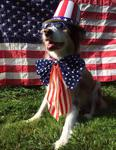
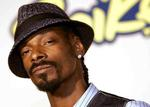
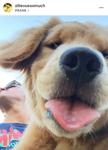
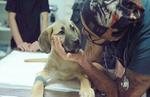
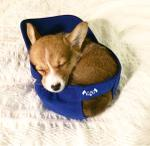
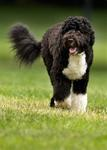
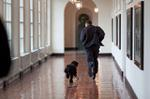
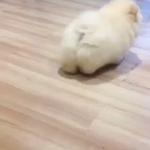
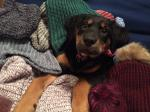
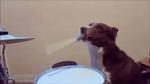
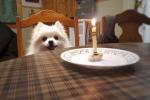
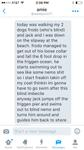
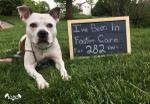
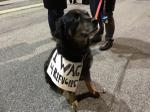
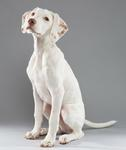

In [94]:
# n=10, can choose the value you want
path = '/Users/mhl/Documents/NanoDegree/Project2/images/'
top_n_author = dog_rates_clean.loc[dog_rates_clean.rating_numerator.sort_values(ascending=False).index[:n]].copy()
#top_n_author = top_n_author.reset_index(drop=True)
top_n_author.index = list(range(1,n+1))
top_n_author['image'] = path + top_n_author.jpg_url.str.extract('\/([^\/]*\.(jpg|png))$')[0]
top_n_author['image'] = top_n_author.image.map(lambda f: get_thumbnail(f))
#top_n_author.style.set_properties(subset=['text'], **{'width': '10px'})
# show 
HTML(top_n_author[['text', 'name','stage','breed','rating_numerator','image']].to_html(formatters={'image': image_formatter}, escape=False))

#### Top n dogs in different view
- retweet count view

In [95]:
top_n_url_retweet = dog_rates_clean.loc[dog_rates_clean.retweet_count.sort_values(ascending=False).index[:n], 'jpg_url']
top_n_url_retweet.str.extract('\/([^\/]*\.(jpg|png))$')
list(top_n_url_retweet)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


['https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg',
 'https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg',
 'https://pbs.twimg.com/ext_tw_video_thumb/739238016737267712/pu/img/-tLpyiuIzD5zR1et.jpg',
 'https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg',
 'https://pbs.twimg.com/ext_tw_video_thumb/879415784908390401/pu/img/cX7XI1TnUsseGET5.jpg',
 'https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg',
 'https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg',
 'https://pbs.twimg.com/ext_tw_video_thumb/761672828462718981/pu/img/R00UYAAWB3GtuHdI.jpg',
 'https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg',
 'https://pbs.twimg.com/ext_tw_video_thumb/859196962498805762/pu/img/-yBpr4-o4GJZECYE.jpg',
 'https://pbs.twimg.com/media/CWJqN9iWwAAg86R.jpg',
 'https://pbs.twimg.com/ext_tw_video_thumb/817827663108771841/pu/img/e9oi839RGWJR37jF.jpg',
 'https://pbs.twimg.com/ext_tw_video_thumb/678399528077250560/pu/img/BOjUNHRsYLeSo0hl.jpg',
 'ht

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


,text,name,stage,breed,retweet_count,image
1,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,None,doggo,Labrador_retriever,79116,
2,This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,Stephan,,Chihuahua,56373,
3,Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC,None,doggo,Eskimo_dog,52101,
4,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,None,puppo,None,47958,
5,This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY,Duddles,,None,45655,
6,This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1,Bo,doggo,None,42045,
7,"""Good afternoon class today we're going to learn what makes a good boy so good"" 13/10 https://t.co/f1h2Fsalv9",None,,None,40437,
8,Ohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboy. 10/10 for all (by happytailsresort) https://t.co/EY8kEFuzK7,None,,None,33230,
9,"This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7TfysWHr",Jamesy,pupper,French_bulldog,32705,
10,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,None,,None,32589,

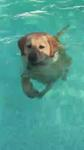
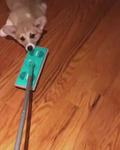
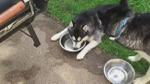
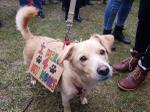
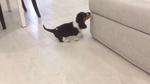
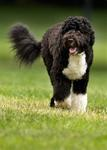
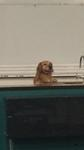
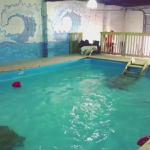
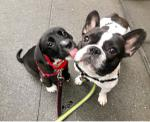
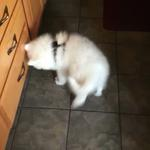
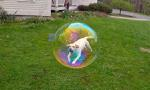
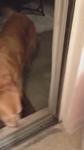
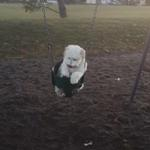
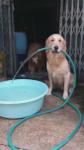
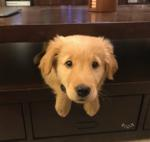

In [96]:
# n=10, can choose the value you want
path = '/Users/mhl/Documents/NanoDegree/Project2/images/'
top_n_retweet = dog_rates_clean.loc[dog_rates_clean.retweet_count.sort_values(ascending=False).index[:n]].copy()
#top_n_retweet = top_n_retweet.reset_index(drop=True)
top_n_retweet.index = list(range(1,n+1))
top_n_retweet['image'] = path + top_n_retweet.jpg_url.str.extract('\/([^\/]*\.(jpg|png))$')[0]
top_n_retweet['image'] = top_n_retweet.image.map(lambda f: get_thumbnail(f))
# show 
HTML(top_n_retweet[['text','name','stage','breed','retweet_count','image']].to_html(formatters={'image': image_formatter}, escape=False))

In [97]:
'''
path = '/Users/mhl/Documents/NanoDegree/Project2/images/'
top_n_retweet_p = dog_rates_clean.loc[dog_rates_clean.retweet_p.sort_values(ascending=False).index[:n]].copy()
top_n_retweet_p = top_n_retweet_p.reset_index(drop=True)
top_n_retweet_p['image'] = path + top_n_retweet_p.jpg_url.str.extract('\/([^\/]*\.(jpg|png))$')[0]
top_n_retweet_p['image'] = top_n_retweet_p.image.map(lambda f: get_thumbnail(f))
# show 
HTML(top_n_retweet_p[['text','name','stage','breed','retweet_p','image']].to_html(formatters={'image': image_formatter}, escape=False))
'''
# no much difference

"\npath = '/Users/mhl/Documents/NanoDegree/Project2/images/'\ntop_n_retweet_p = dog_rates_clean.loc[dog_rates_clean.retweet_p.sort_values(ascending=False).index[:n]].copy()\ntop_n_retweet_p = top_n_retweet_p.reset_index(drop=True)\ntop_n_retweet_p['image'] = path + top_n_retweet_p.jpg_url.str.extract('\\/([^\\/]*\\.(jpg|png))$')[0]\ntop_n_retweet_p['image'] = top_n_retweet_p.image.map(lambda f: get_thumbnail(f))\n# show \nHTML(top_n_retweet_p[['text','name','stage','breed','retweet_p','image']].to_html(formatters={'image': image_formatter}, escape=False))\n"

#### Top n dogs in different view
- favorite count view

In [98]:
top_n_url_favorite = dog_rates_clean.loc[dog_rates_clean.favorite_count.sort_values(ascending=False).index[:n], 'jpg_url']
top_n_url_favorite.str.extract('\/([^\/]*\.jpg)$')
list(top_n_url_favorite)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


['https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg',
 'https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg',
 'https://pbs.twimg.com/ext_tw_video_thumb/879415784908390401/pu/img/cX7XI1TnUsseGET5.jpg',
 'https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg',
 'https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg',
 'https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg',
 'https://pbs.twimg.com/ext_tw_video_thumb/859196962498805762/pu/img/-yBpr4-o4GJZECYE.jpg',
 'https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg',
 'https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg',
 'https://pbs.twimg.com/media/DC5YqoQW0AArOLH.jpg',
 'https://pbs.twimg.com/media/DEfjEaNXkAAtPlj.jpg',
 'https://pbs.twimg.com/media/C_bIo7QXYAAGfPu.jpg',
 'https://pbs.twimg.com/ext_tw_video_thumb/739238016737267712/pu/img/-tLpyiuIzD5zR1et.jpg',
 'https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg',
 'https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg']

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


,text,name,stage,breed,favorite_count,image
1,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,None,puppo,None,132318,
2,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,None,doggo,Labrador_retriever,130533,
3,This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY,Duddles,,None,107834,
4,This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,Stephan,,Chihuahua,106634,
5,"This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7TfysWHr",Jamesy,pupper,French_bulldog,106481,
6,This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1,Bo,doggo,None,95138,
7,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,None,,None,94035,
8,This is Zoey. She really likes the planet. Would hate to see willful ignorance and the denial of fairly elemental science destroy it. 13/10 https://t.co/T1xlgaPujm,Zoey,,golden_retriever,84753,
9,"""Good afternoon class today we're going to learn what makes a good boy so good"" 13/10 https://t.co/f1h2Fsalv9",None,,None,83401,
10,This is Aja. She was just told she's a good dog. Suspicions confirmed. 13/10 would tell again https://t.co/lsPyyAiF1r,Aja,,Chesapeake_Bay_retriever,81450,

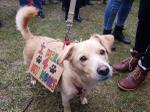
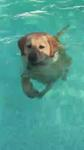
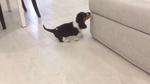
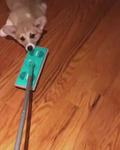
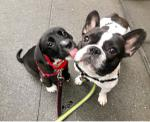
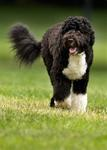
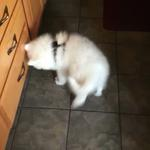
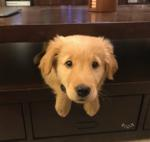
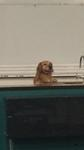
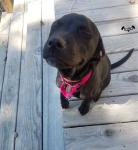
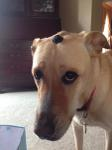
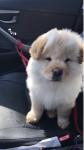
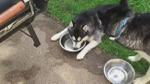
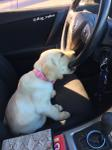
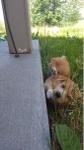

In [99]:
# n=10, can choose the value you want
path = '/Users/mhl/Documents/NanoDegree/Project2/images/'
top_n_favorite = dog_rates_clean.loc[dog_rates_clean.favorite_count.sort_values(ascending=False).index[:n]].copy()
#top_n_favorite = top_n_favorite.reset_index(drop=True)
top_n_favorite.index = list(range(1,n+1))
top_n_favorite['image'] = path + top_n_favorite.jpg_url.str.extract('\/([^\/]*\.(jpg|png))$')[0]
top_n_favorite['image'] = top_n_favorite.image.map(lambda f: get_thumbnail(f))
# show 
HTML(top_n_favorite[['text','name','stage','breed','favorite_count','image']].to_html(formatters={'image': image_formatter}, escape=False))

In [100]:
'''
path = '/Users/mhl/Documents/NanoDegree/Project2/images/'
top_n_favorite_p = dog_rates_clean.loc[dog_rates_clean.favorite_p.sort_values(ascending=False).index[:10]].copy()
top_n_favorite_p = top_n_favorite_p.reset_index(drop=True)
top_n_favorite_p['image'] = path + top_n_favorite_p.jpg_url.str.extract('\/([^\/]*\.(jpg|png))$')[0]
top_n_favorite_p['image'] = top_n_favorite_p.image.map(lambda f: get_thumbnail(f))
# show 
HTML(top_n_favorite_p[['text','name','stage','breed','favorite_p','image']].to_html(formatters={'image': image_formatter}, escape=False))
'''
# no much difference

"\npath = '/Users/mhl/Documents/NanoDegree/Project2/images/'\ntop_n_favorite_p = dog_rates_clean.loc[dog_rates_clean.favorite_p.sort_values(ascending=False).index[:10]].copy()\ntop_n_favorite_p = top_n_favorite_p.reset_index(drop=True)\ntop_n_favorite_p['image'] = path + top_n_favorite_p.jpg_url.str.extract('\\/([^\\/]*\\.(jpg|png))$')[0]\ntop_n_favorite_p['image'] = top_n_favorite_p.image.map(lambda f: get_thumbnail(f))\n# show \nHTML(top_n_favorite_p[['text','name','stage','breed','favorite_p','image']].to_html(formatters={'image': image_formatter}, escape=False))\n"